In [9]:
import numpy as np

In [1]:
import linefinder.analyze_data.worldlines as worldlines
import linefinder.analyze_data.plot_worldlines as plot_worldlines

# Load the Data

In [2]:
w = worldlines.Worldlines(
    data_dir = '/scratch/03057/zhafen/linefinder_data/multiphysics/m12i_res7100_mhdcv/data',
    tag = 'm12imhdcv_clustersofFIRE_pop1',
    halo_data_dir = '/scratch/03057/zhafen/multiphysics/m12i_res7100_mhdcv/halo',
    main_halo_id = 0,
)

In [3]:
w_plotter = plot_worldlines.WorldlinesPlotter( w, )

In [13]:
# We'll explore classifications relative to this snapshot
snum = 600
ind = snum - 600

# Explore the Data

## What Fraction of IDs are Still Gas by $z=0$?

In [14]:
p_types = w.get_data( 'PType' )
n_stars = np.sum( p_types[:,ind] == 4 )
n_gas = np.sum( p_types[:,ind] == 0 )
n_stars, n_gas

(100000, 0)

Good, these are all stars by $z=0$

## Look at Radial History versus Time for a Few Particles

411.64557

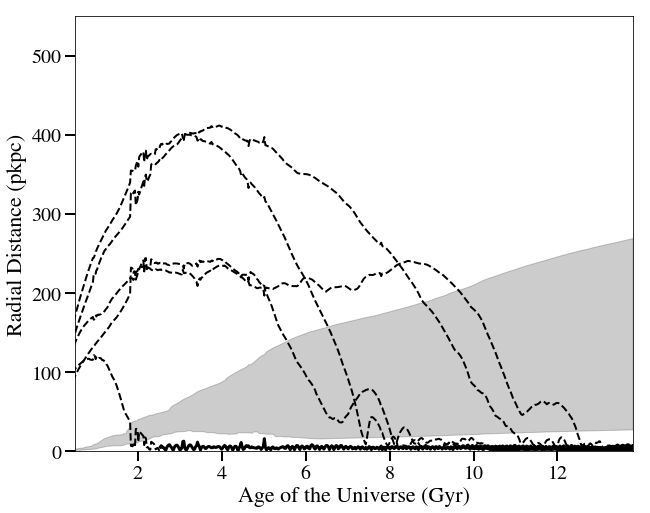

In [88]:
w_plotter.plot_streamlines_vs_time(
    y_key = 'R',
    classification = None,
    classification_ind = ind,
    start_ind = 0,
    end_ind = 600,
    sample_size = 5,
#     y_data_kwargs = { 'smooth_data' : True },
#     ax = ax,
    x_range = [0.5, 13.8 ],
    y_range = [0., 550., ],
    horizontal_line_value = None,
    plot_CGM_region = True,
    return_y_max = True,
    vert_line_at_classification_ind = False,
    line_features = {
        'is_star': {
            'key': 'PType',
            'value': 4,
            'data_kwargs': {},
            'line_attrs': {
                'linewidth': 3,
                'color': 'k',
                },
        },
        'is_gas': {
            'key': 'PType',
            'value': 0,
            'data_kwargs': {},
            'line_attrs': {
                'linewidth': 2,
                'color': 'k',
                'linestyle': '--',
                },
            }
    },
)

116.92087

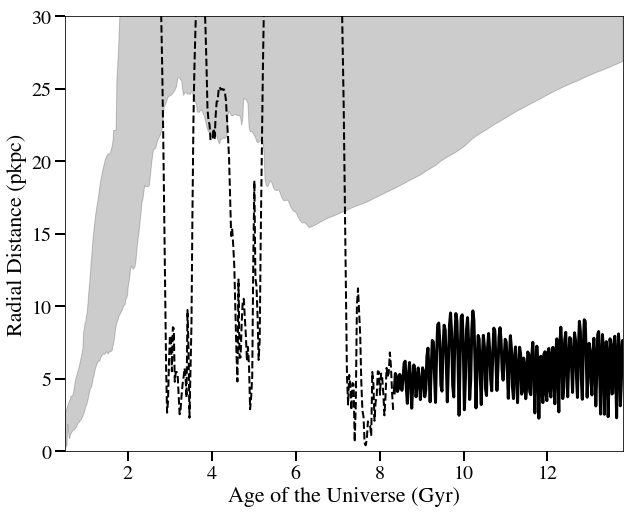

In [92]:
# fig = plt.figure( figsize=(13,8), facecolor='w' )
# ax = plt.gca()


w_plotter.plot_streamlines_vs_time(
    y_key = 'R',
    classification = None,
    classification_ind = ind,
    start_ind = 0,
    end_ind = 600,
    sample_size = 1,
#     y_data_kwargs = { 'smooth_data' : True },
#     ax = ax,
    x_range = [0.5, 13.8 ],
    y_range = [0., 30., ],
    horizontal_line_value = None,
    plot_CGM_region = True,
    return_y_max = True,
    vert_line_at_classification_ind = False,
    line_features = {
        'is_star': {
            'key': 'PType',
            'value': 4,
            'data_kwargs': {},
            'line_attrs': {
                'linewidth': 3,
                'color': 'k',
                },
        },
        'is_gas': {
            'key': 'PType',
            'value': 0,
            'data_kwargs': {},
            'line_attrs': {
                'linewidth': 2,
                'color': 'k',
                'linestyle': '--',
                },
            }
    },
)

In [79]:
w.ptracks.data['M_enc'][:,1:].max()

0.0

In [4]:
l = list(range(12))
l[:8] + l[9:] + l[8:9]

[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 8]